In [1]:
import numpy as np 
import matplotlib
from matplotlib import pyplot as plt

def MHK2(x, y, s_y=None, s_x=None, label=None, scattercolor=None, linecolor=None, showline=None, xlabel=None, ylabel=None, title=None):
    array_x = np.array(x)
    x_ = array_x.mean()

    array_y = np.array(y)
    y_ = array_y.mean()

    array_xy = np.array(x * y)
    xy_ = array_xy.mean()

    array_x2 = np.array(x * x)
    x2_ = array_x2.mean()

    array_y2 = np.array(y * y)
    y2_ = array_y2.mean()

    k = (xy_ - x_ * y_) / (x2_ - x_ ** 2)

    b = y_ - k * x_

    Dyy = y2_ - y_ ** 2
    Dxx = x2_ - x_ ** 2

    sigma_k = ((Dyy / Dxx - k  ** 2) / (len(x) - 2)) ** 0.5

    sigma_b = sigma_k * ((x2_) ** 0.5)

    plt.grid(True)
    plt.minorticks_on()
    plt.grid(which = 'minor', alpha = 0.2)
    
    plt.errorbar(x, y, xerr=s_x, yerr=s_y, linestyle="None", color=scattercolor)
    plt.scatter(x, y, s=6, color = scattercolor, label=label)
    
    if showline == True: 
        x0 = np.array([min(x), max(x)])
        y0 = k * x0 + b
        plt.plot(x0,y0, 'k--', color=linecolor)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()

    print("k: ", k, "sigma_k: ", sigma_k, "b: ", b, "sigma_b: ", sigma_b)
    return(k, sigma_k, b, sigma_b)

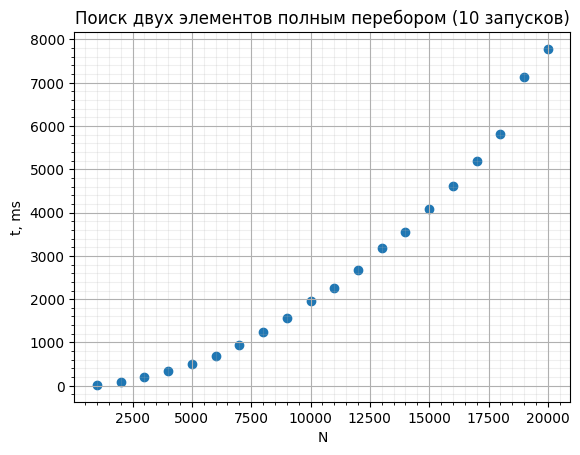

/var/folders/qq/pjggzry53mq7xbvhcjr59g800000gp/T/ipykernel_82676/1325610137.py:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x0,y0, 'k--', color=linecolor)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


k:  1.8764069995270588e-05 sigma_k:  2.690597443950084e-07 b:  -2.744044321329511 sigma_b:  51.144924130451564


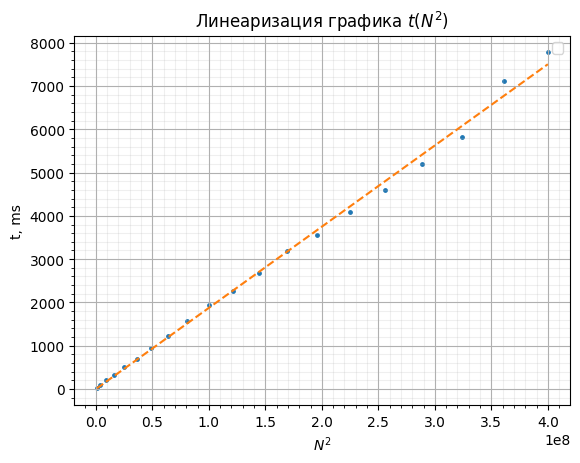

In [9]:
f1 = open('sum_search.txt', 'r')
lines1 = f1.readlines()
t1 = np.array(list(map(int, lines1[0].split())))
N1 = np.array(list(map(int, lines1[1].split())))
plt.scatter(N1, t1)
plt.grid(True)
plt.minorticks_on()
plt.grid(which = 'minor', alpha = 0.2)
plt.title("Поиск двух элементов полным перебором (10 запусков)")
plt.xlabel("N")
plt.ylabel("t, ms")
plt.show()

n1 = np.array(N1 ** 2)
MHK2(n1, t1, showline=True)
plt.grid(True)
plt.minorticks_on()
plt.grid(which = 'minor', alpha = 0.2)
plt.title("Линеаризация графика $t(N^2)$")
plt.xlabel("$N^2$")
plt.ylabel("t, ms")

/var/folders/qq/pjggzry53mq7xbvhcjr59g800000gp/T/ipykernel_82676/1325610137.py:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x0,y0, 'k--', color=linecolor)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


k:  0.0018386992481203008 sigma_k:  8.72646542415162e-06 b:  62.01578947368421 sigma_b:  10.4535625638555


Text(0, 0.5, 't, ms')

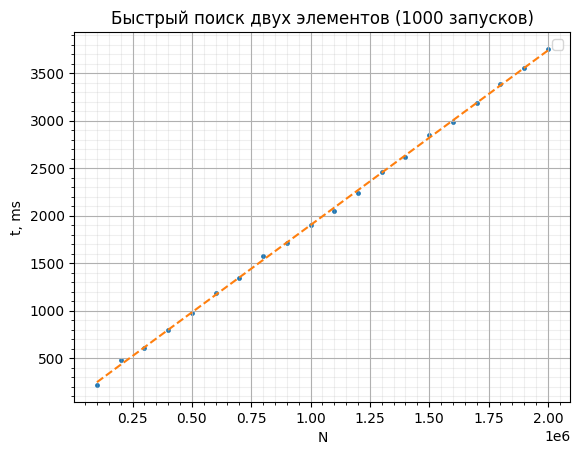

In [12]:
f2 = open('sum_speed_search.txt', 'r')
lines2 = f2.readlines()
t2 = np.array(list(map(int, lines2[0].split())))
N2 = np.array(list(map(int, lines2[1].split())))

MHK2(N2, t2, showline=True)
plt.grid(True)
plt.minorticks_on()
plt.grid(which = 'minor', alpha = 0.2)
plt.title("Быстрый поиск двух элементов (1000 запусков)")
plt.xlabel("N")
plt.ylabel("t, ms")